<a href="https://colab.research.google.com/github/shweta-aiml/100daysofcode/blob/master/Novartis_DataScienceHackerrank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
#required installations 
!pip3 install sklearn
!pip3 install imbalanced-learn


Best algorithm for Binary Classification problems are , I will be checking accuracy in all and consider the best one. 

*   Logistic Regression.
*   k-Nearest Neighbors.
*   Decision Trees.
*   Support Vector Machine.
*   Naive Bayes.

---




In [0]:
#importing library
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score

In [66]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
dir = '/content/gdrive/My Drive/NovartisHackerrank/'
dftrain  = pd.read_csv(os.path.join(dir,'Train.csv'))
dftest  = pd.read_csv(os.path.join(dir,'Test.csv'))
dfsampleSubmission  = pd.read_csv(os.path.join(dir,'sample_submission.csv'))



In [0]:
#method to check null columns and replace with mean
def NullColumn(df):
    nas = pd.concat([df.isnull().sum()],axis=1)
    return (nas[nas.sum(axis=1)>0])

def ReplaceNullColumnWithMean(df,col):
    df[col] = df[col].fillna(df[col].mean())


In [81]:
print(NullColumn(dftrain))

        0
X_12  182


In [0]:
ReplaceNullColumnWithMean(dftrain,'X_12')

In [83]:
print(NullColumn(dftest))

        0
X_12  127


In [0]:
ReplaceNullColumnWithMean(dftest,'X_12')

In [84]:
dftrain['MULTIPLE_OFFENSE'].value_counts()

1    22788
0     1068
Name: MULTIPLE_OFFENSE, dtype: int64

This is clearly an imbalanced dataset , lets use SMOTE to create more data, before we create more data we will look into the columns to check what columns add from what columns we can retrieve more information.

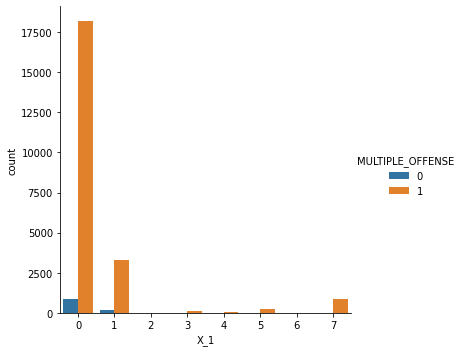

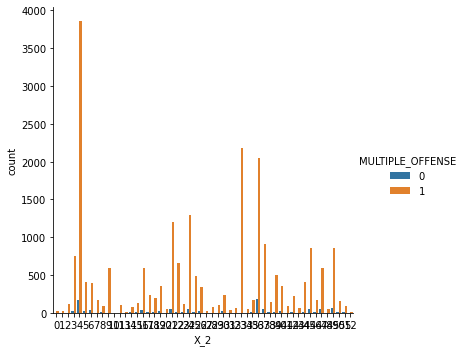

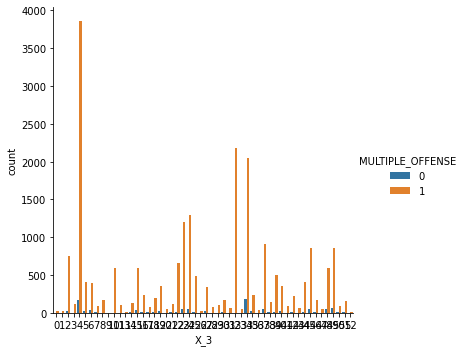

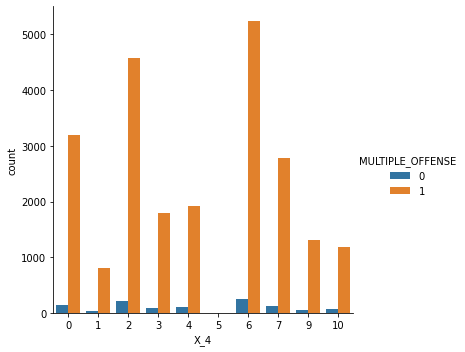

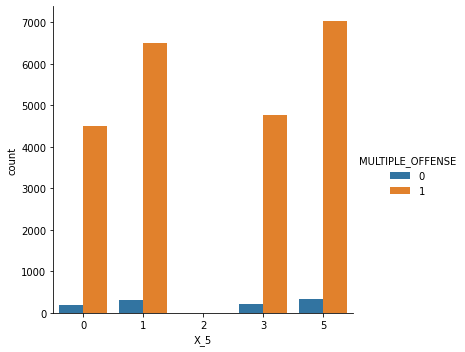

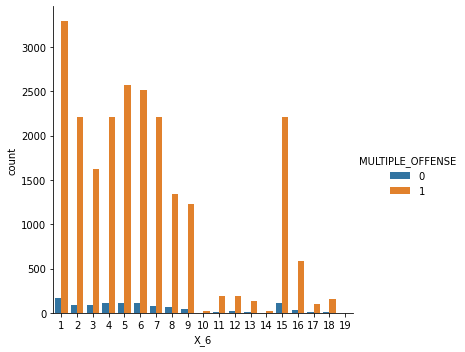

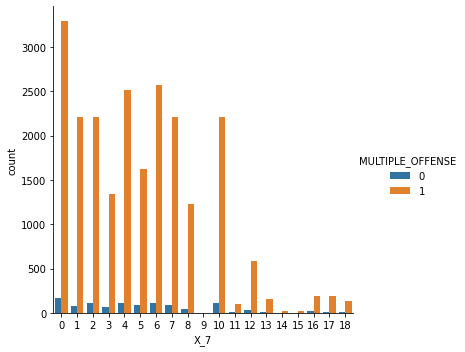

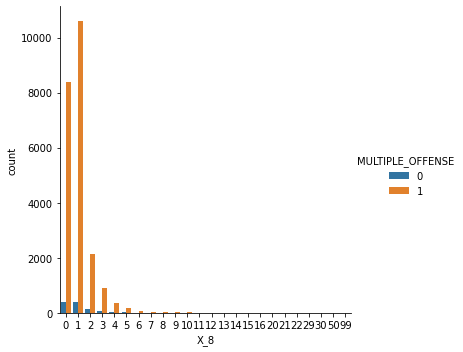

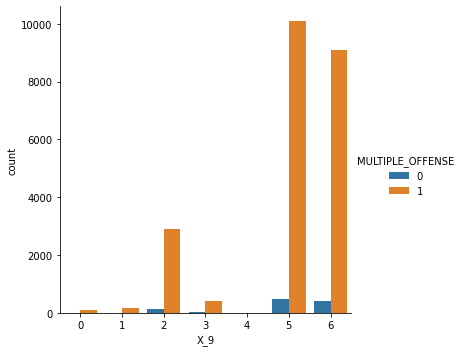

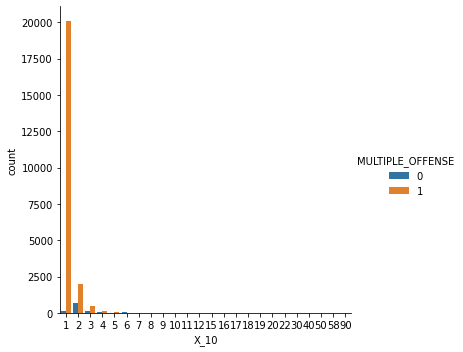

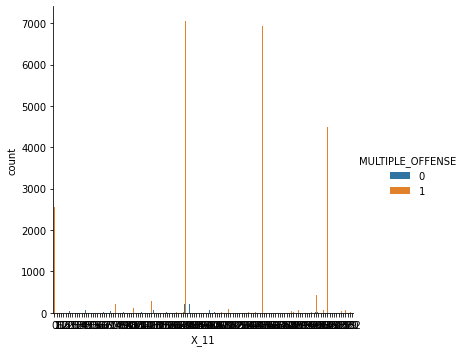

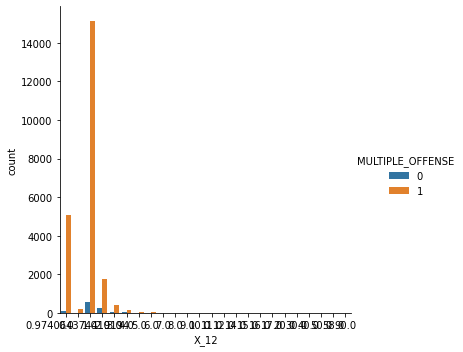

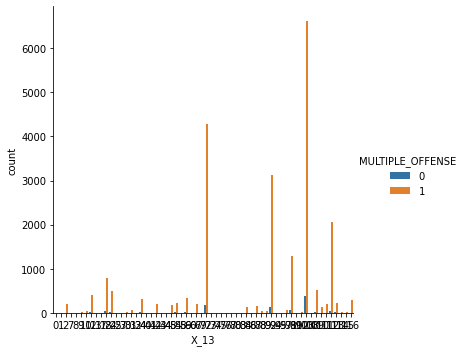

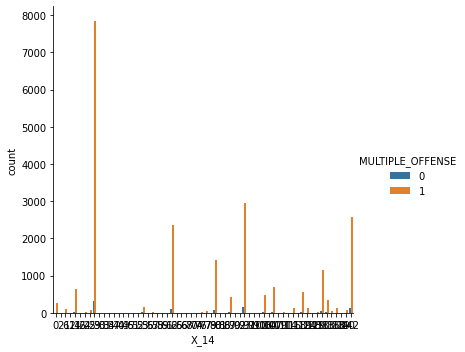

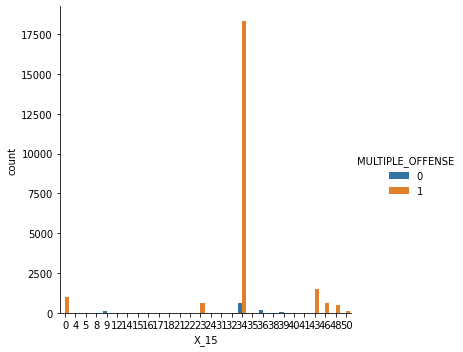

In [100]:
# Countplot 
for i in range(1,16):
  x = 'X_'+str(i)
  sns.catplot(x =x, hue ="MULTIPLE_OFFENSE",  kind ="count", data = dftrain) 

In [203]:
  for i in dftrain.columns:
    print(i + " unique values are ",dftrain[i].nunique() ,"\n")


INCIDENT_ID unique values are  23856 

DATE unique values are  9121 

X_1 unique values are  8 

X_2 unique values are  52 

X_3 unique values are  52 

X_4 unique values are  10 

X_5 unique values are  5 

X_6 unique values are  19 

X_7 unique values are  19 

X_8 unique values are  24 

X_9 unique values are  7 

X_10 unique values are  24 

X_11 unique values are  133 

X_12 unique values are  24 

X_13 unique values are  60 

X_14 unique values are  62 

X_15 unique values are  28 

MULTIPLE_OFFENSE unique values are  2 

year unique values are  28 

month unique values are  12 

day unique values are  31 

dayOfweek unique values are  7 

MonthRange unique values are  5 



The above clearly shows that all columns have data and all numeric columns can be considered , we can ignore columns that have > 10 count of unique values.  

Splitting the Date column into year,month,dayofweek and date

In [109]:
# Convert the Date Time column to datatime format 
dftrain['year'] = pd.DatetimeIndex(dftrain['DATE']).year
dftrain['month'] = pd.DatetimeIndex(dftrain['DATE']).month
dftrain['day'] = pd.DatetimeIndex(dftrain['DATE']).day
dftrain['dayOfweek'] =pd.DatetimeIndex(dftrain['DATE']).day_name()
dftrain.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE,year,month,day,dayOfweek
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0,2004,7,4,Sunday
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1,2017,7,18,Tuesday
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1,2017,3,15,Wednesday
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1,2009,2,13,Friday
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1,2005,4,13,Wednesday


In [116]:
#perform the same on test data 
dftest['year'] = pd.DatetimeIndex(dftest['DATE']).year
dftest['month'] = pd.DatetimeIndex(dftest['DATE']).month
dftest['day'] = pd.DatetimeIndex(dftest['DATE']).day
dftest['dayOfweek'] =pd.DatetimeIndex(dftest['DATE']).day_name()
dftest.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,year,month,day,dayOfweek
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23,2018,2,1,Thursday
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34,2004,3,5,Friday
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34,2018,1,27,Saturday
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34,2006,8,18,Friday
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43,2011,10,31,Monday


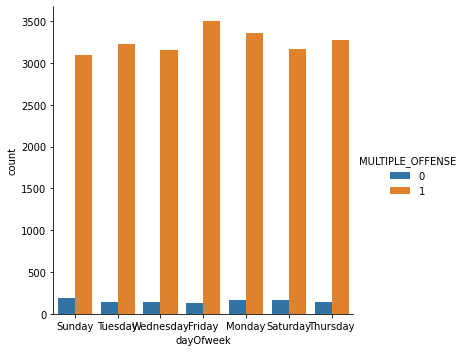

In [110]:
# Countplot 
sns.catplot(x ='dayOfweek', hue ="MULTIPLE_OFFENSE",  kind ="count", data = dftrain) 

In [111]:
#converting month to range of month to get the information which month may have more hacked incidents
dftrain['MonthRange'] = pd.cut(dftrain['month'],5)
dftrain['MonthRange'].value_counts()

(9.8, 12.0]     5486
(0.989, 3.2]    5444
(7.6, 9.8]      4400
(5.4, 7.6]      4270
(3.2, 5.4]      4256
Name: MonthRange, dtype: int64

In [117]:
dftest['MonthRange'] = pd.cut(dftest['month'],5)
dftest['MonthRange'].value_counts()

(9.8, 12.0]     3784
(0.989, 3.2]    3592
(7.6, 9.8]      2871
(3.2, 5.4]      2834
(5.4, 7.6]      2822
Name: MonthRange, dtype: int64

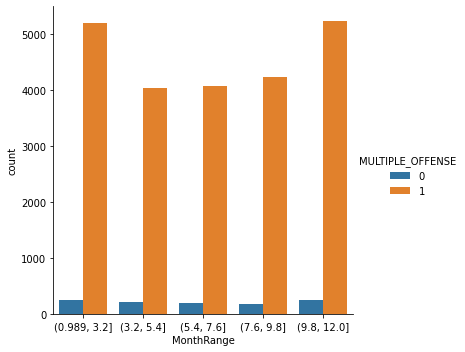

In [114]:
sns.catplot(x ='MonthRange', hue ="MULTIPLE_OFFENSE",  kind ="count", data = dftrain) 


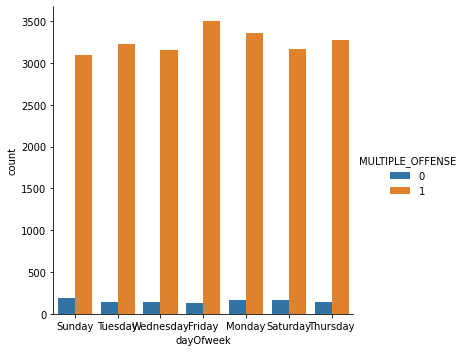

In [49]:
sns.catplot(x ='dayOfweek', hue ="MULTIPLE_OFFENSE",  kind ="count", data = dftrain) 


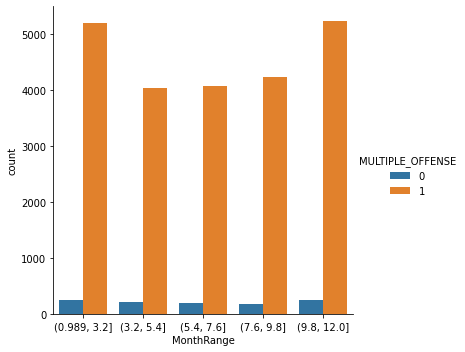

In [50]:
sns.catplot(x ='MonthRange', hue ="MULTIPLE_OFFENSE",  kind ="count", data = dftrain) 


(9.8, 12.0]     5486
(0.989, 3.2]    5444
(7.6, 9.8]      4400
(5.4, 7.6]      4270
(3.2, 5.4]      4256
Name: MonthRange, dtype: int64

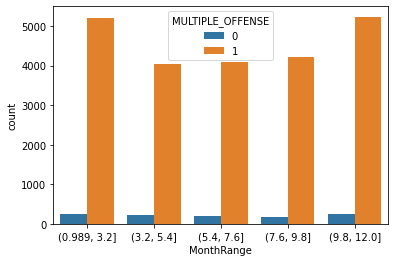

In [57]:
sns.countplot(x='MonthRange',hue=dftrain['MULTIPLE_OFFENSE'],data=dftrain)
dftrain['MonthRange'].value_counts()

Converting dayofweek to category codes both test and train dataset


In [123]:
dftrain['dayOfweek'] = dftrain['dayOfweek'].astype('category').cat.codes
dftrain['dayOfweek'].value_counts()

0    3636
1    3523
4    3424
5    3371
2    3330
6    3292
3    3280
Name: dayOfweek, dtype: int64

In [122]:
dftest['dayOfweek'] = dftest['dayOfweek'].astype('category').cat.codes
dftest['dayOfweek'].value_counts()

0    2396
2    2329
1    2327
5    2276
6    2254
4    2203
3    2118
Name: dayOfweek, dtype: int64

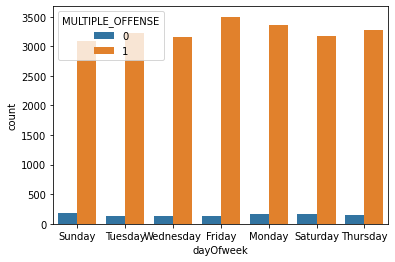

In [55]:
sns.countplot(x='dayOfweek',hue=dftrain['MULTIPLE_OFFENSE'],data=dftrain)


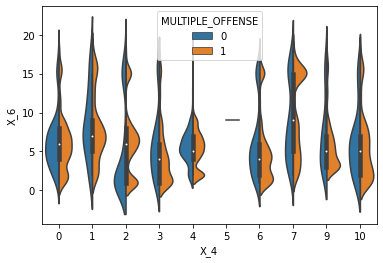

In [120]:
# Violinplot Displays distribution of data  
# across all levels of a category. 
sns.violinplot(x ="X_4", y ="X_6", hue ="MULTIPLE_OFFENSE",  
data = dftrain, split = True)

check to see if any value as very low count

In [124]:
for i in range(1,16):
  x = 'X_'+str(i)
  print(dftrain[x].value_counts())
  print('******************************************')


0    19036
1     3497
7      876
5      270
3      136
4       26
2       10
6        5
Name: X_1, dtype: int64
******************************************
4     4029
36    2232
33    2174
24    1344
21    1254
37     962
49     927
45     908
3      778
22     672
47     641
16     631
9      593
39     513
25     499
5      437
6      434
44     428
40     385
19     370
26     356
30     266
42     238
17     238
18     210
35     186
46     181
7      166
38     164
50     160
15     136
23     122
2      116
11     107
8      104
51     103
29      99
41      93
14      84
28      78
32      69
43      69
34      56
48      55
20      54
31      43
27      23
0       22
1       20
52      19
13       6
10       2
Name: X_2, dtype: int64
******************************************
4     4029
34    2232
32    2174
24    1344
23    1254
37     962
49     927
45     908
2      778
22     672
48     641
15     631
10     593
39     513
25     499
5      437
6      434
44     428
40     3

In [0]:
Y_train = dftrain["MULTIPLE_OFFENSE"]

X_train = dftrain.drop(["MULTIPLE_OFFENSE",'DATE','INCIDENT_ID'], axis=1)
X_test = dftest.drop(["DATE",'INCIDENT_ID'], axis=1)



In [236]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(19084, 20) (19084,)
(4772, 20) (4772,)


Create SMOTE  data 


In [237]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  


Before OverSampling, counts of label '1': 18224
Before OverSampling, counts of label '0': 860 



In [239]:
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (36448, 20)
After OverSampling, the shape of train_y: (36448,) 

After OverSampling, counts of label '1': 18224
After OverSampling, counts of label '0': 18224


In [0]:
X_train_resample, X_val, y_train_resample, y_val = train_test_split(X_train_res, y_train_res ,test_size=0.3, random_state=10)

In [243]:
print('After resampling , the shape of training and validation data')
print(X_train_resample.shape , y_train_resample.shape)
print(X_val.shape , y_val.shape)

After resampling , the shape of training and validation data
(25513, 20) (25513,)
(10935, 20) (10935,)


In [0]:
def Score(y_true,y_pred):
  return recall_score(y_true, y_pred, average='macro')

In [228]:
logreg = LogisticRegression()
logreg.fit(X_train_resample, y_train_resample)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train_res, y_train_res) * 100, 2)


ValueError: ignored

In [196]:
y_train_res.shape,Y_pred.shape

((36440,), (36440,))

In [247]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2) 
knn.fit(X_train_res, y_train_res) 
print(y_train_res.shape)
Y_pred = knn.predict(X_test) 


r1=dftest['INCIDENT_ID']
r2=pd.DataFrame(Y_pred,columns=['MULTIPLE_OFFENSE'])
result=pd.concat([r1,r2],axis=1)
print(result.head())
result.to_csv('/content/gdrive/My Drive/NovartisHackerrank/sample_submission.csv',index=False)

(36448,)
  INCIDENT_ID  MULTIPLE_OFFENSE
0   CR_195453               1.0
1   CR_103520               1.0
2   CR_196089               0.0
3   CR_112195               1.0
4   CR_149832               1.0


In [190]:
y_train_res.shape,

((36440,), (4772,))

In [138]:
print(acc_knn)

97.52


In [213]:
from sklearn.svm import SVC, LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train_res, y_train_res)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train_res, y_train_res) * 100, 2)



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [142]:
print(acc_linear_svc)

50.41


In [221]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train_res, y_train_res)
print(y_train_res.shape)

Y_pred = decision_tree.predict(X_test)
print(Y_pred.shape)
# acc_decision_tree = round(decision_tree.score(X_train_res, y_train_res) * 100, 2)
# print(acc_decision_tree)
# acc_dt_score= Score(Y_pred,y_train_res)


(36472,)
(4772,)


In [252]:
random_forest = RandomForestClassifier(n_estimators=100)
print(X_train_resample.shape , y_train_resample.shape)

random_forest.fit(X_train_resample, y_train_resample)

Y_prediction = random_forest.predict(X_test)





(25513, 20) (25513,)


In [215]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest',
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, 
               acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head()

,Model
Score,
100.00,Random Forest
100.00,Decision Tree
98.51,KNN
80.48,Logistic Regression
55.55,Support Vector Machines


In [253]:
r1=dftest['INCIDENT_ID']
r2=pd.DataFrame(Y_prediction,columns=['MULTIPLE_OFFENSE'])
result=pd.concat([r1,r2],axis=1)
print(result.head())
result.to_csv('/content/gdrive/My Drive/NovartisHackerrank/sample_submission.csv',index=False)


  INCIDENT_ID  MULTIPLE_OFFENSE
0   CR_195453               1.0
1   CR_103520               1.0
2   CR_196089               1.0
3   CR_112195               1.0
4   CR_149832               1.0


In [219]:
print(Y_prediction.shape,X_train_res.shape)

(4772,) (36472, 20)


In [254]:
dftrain.INCIDENT_ID.shape

(23856,)